In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../../data/processed/cleaned.csv')
df.head(5)

,Date of sale,Time of sale,Date of listing,Bundle,Brand,Description,Size,Item price,Buyer shipping cost,Total,...,Payment type,Category,City,State,Post Code,Country,US Sales tax,Refunded to buyer amount,Fees refunded to seller,order_id
0,2024-07-01,7:16 PM,2024-06-16,No,Other,Limited NYC 2023 Dragon Ball Daima Special Pan...,XL,24.0,6.29,31.97,...,STRIPE,T-shirts,Altoona,Iowa,50009-2688,US,1.68,0.00,0.00,7f3f7bfd-24f4-43ed-bd19-1f7202f30be2
1,2024-08-05,10:39 PM,2024-06-16,No,Starter,90s Vintage Starter Denver Broncos Superbowl X...,L,25.0,6.29,33.15,...,STRIPE,T-shirts,Lehi,Utah,84043,US,1.86,5.76,1.51,d1f6a451-94f0-4b89-9293-0a7f372048f4
2,2024-08-06,3:13 AM,2024-07-21,No,Other,NYPD shirt\n\nSize: Medium\nMeasurements: 20 W...,M,10.0,6.29,17.08,...,STRIPE,T-shirts,Phoenix,Arizona,85048-8746,US,0.79,0.00,0.00,d0b74a5d-4027-434f-8b8f-f417bfc89663
3,2024-08-07,4:42 AM,2024-07-21,No,Hard Rock Cafe,Hard Rock Cafe grey and white shirt\n\nSize: L...,L,8.0,6.29,14.91,...,STRIPE,T-shirts,Fair Oaks,California,95628-5529,US,0.62,0.00,0.00,2c4034c2-d8b8-4c15-b4d5-fa73cbafd356
4,2024-08-08,2:05 AM,2024-08-07,No,Other,Polo shirt\n\nSize: Medium,M,6.0,6.29,12.73,...,STRIPE,Polo shirts,Saratoga Springs,Utah,84045-8154,US,0.44,0.00,0.00,535dba05-1c9a-4f39-adfa-f72e4a7b18bc


In [35]:
# Info on data structure
print(df.info())

# Summary Stats
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date of sale              53 non-null     object 
 1   Time of sale              53 non-null     object 
 2   Date of listing           53 non-null     object 
 3   Bundle                    53 non-null     object 
 4   Brand                     53 non-null     object 
 5   Description               53 non-null     object 
 6   Size                      53 non-null     object 
 7   Item price                53 non-null     float64
 8   Buyer shipping cost       53 non-null     float64
 9   Total                     53 non-null     float64
 10  USPS Cost                 53 non-null     float64
 11  Depop fee                 53 non-null     float64
 12  Depop Payments fee        53 non-null     float64
 13  Boosting fee              53 non-null     float64
 14  Payment type

### Univariate Analysis For Numerical Columns

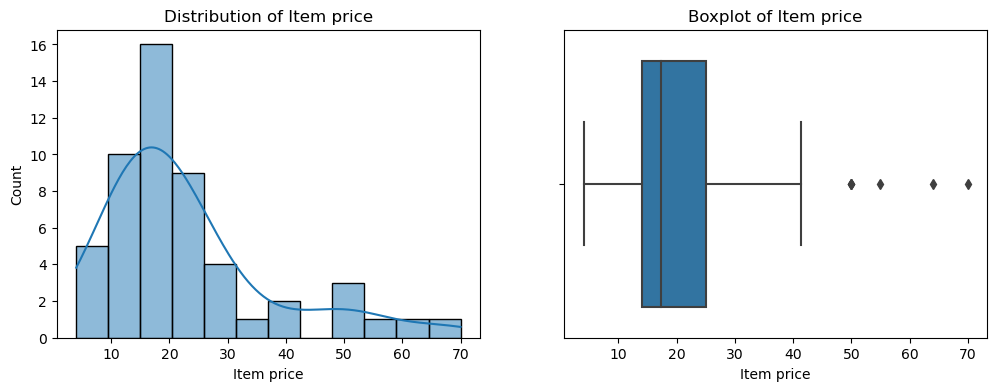

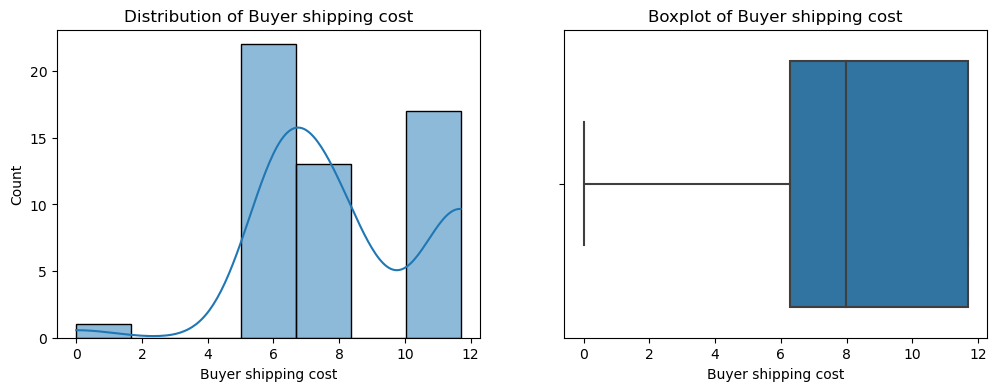

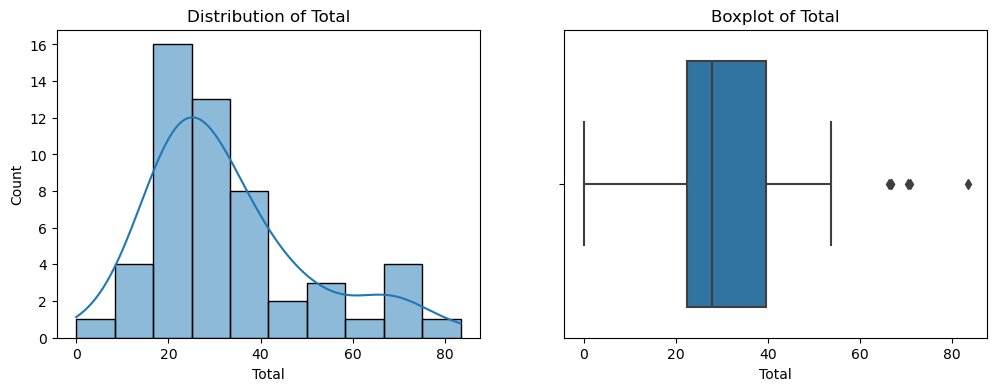

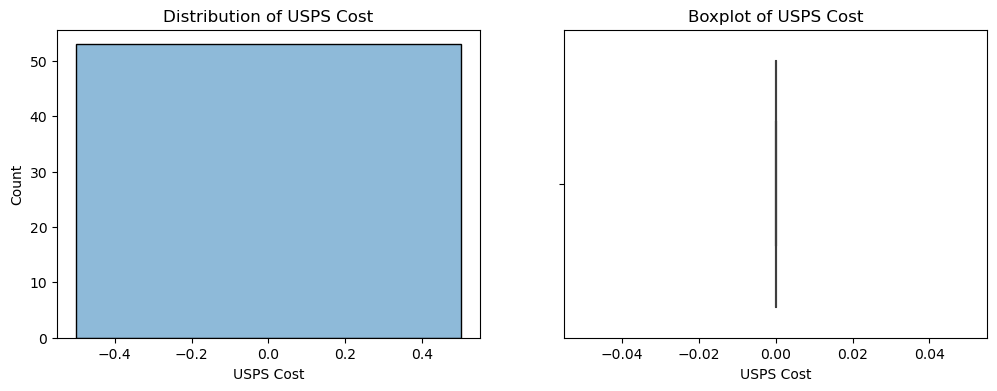

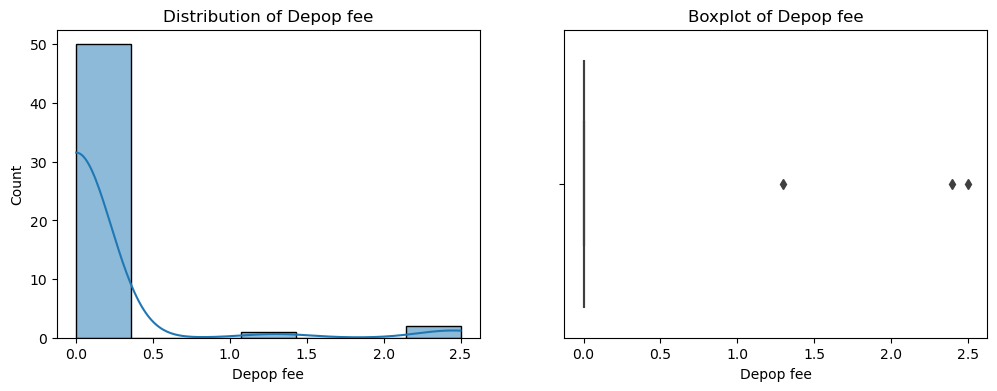

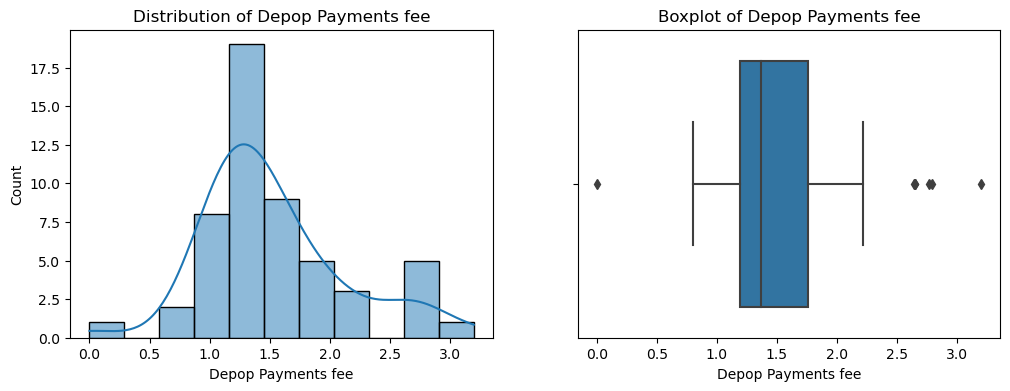

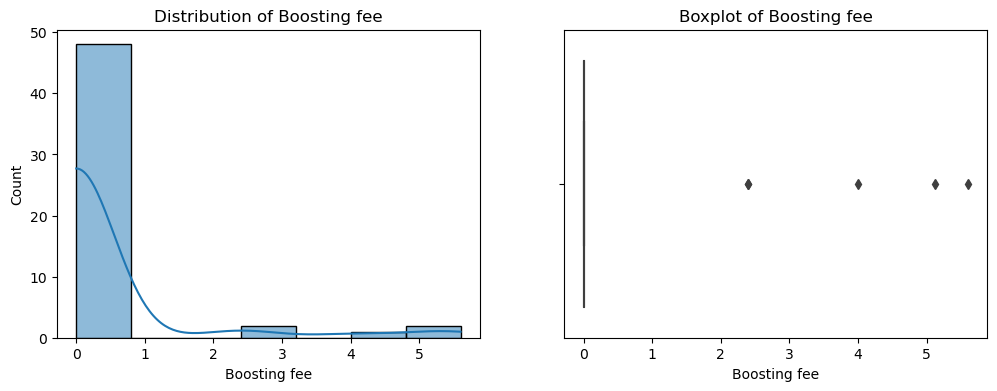

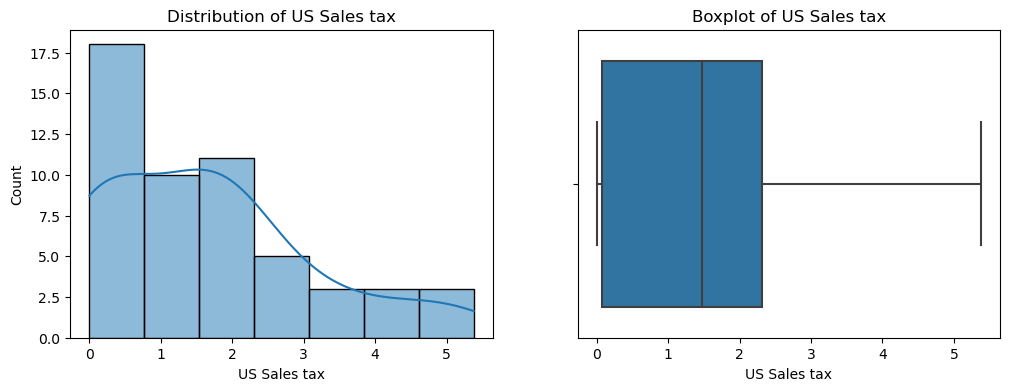

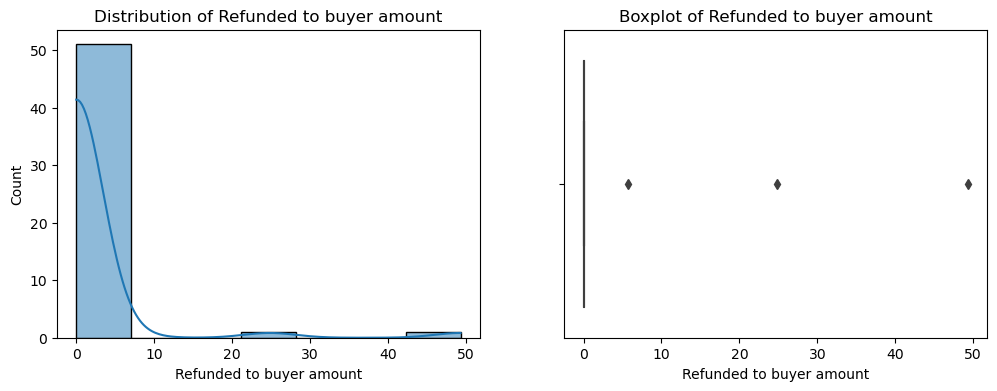

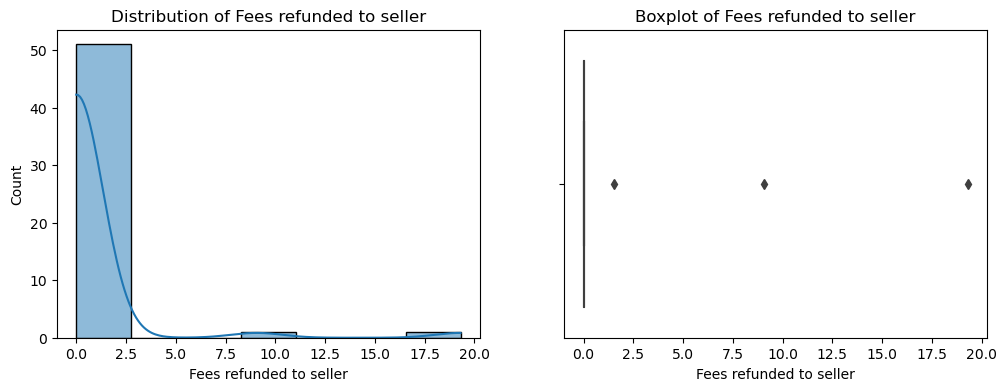

In [36]:
float_cols = df.select_dtypes(include=['float', 'float64']).columns

for col in float_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Univariate Analysis On Categorical Columns

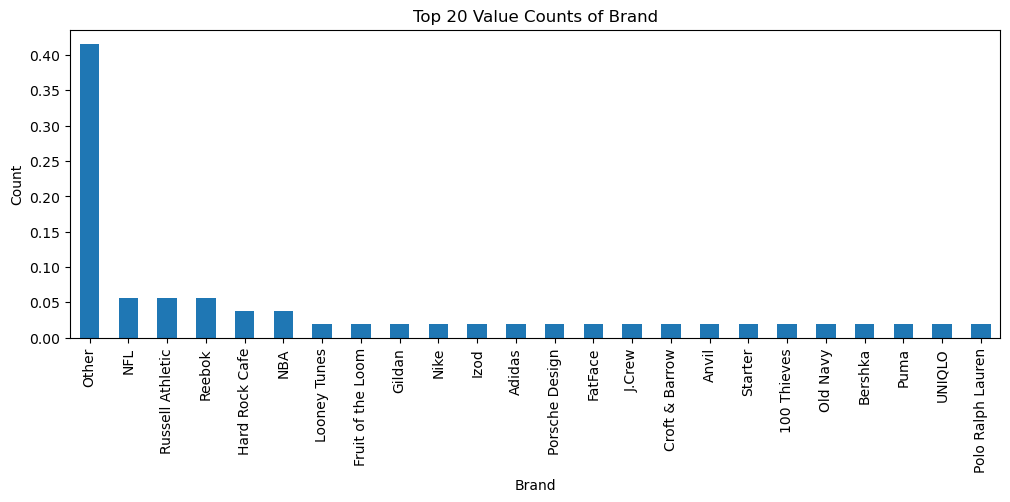

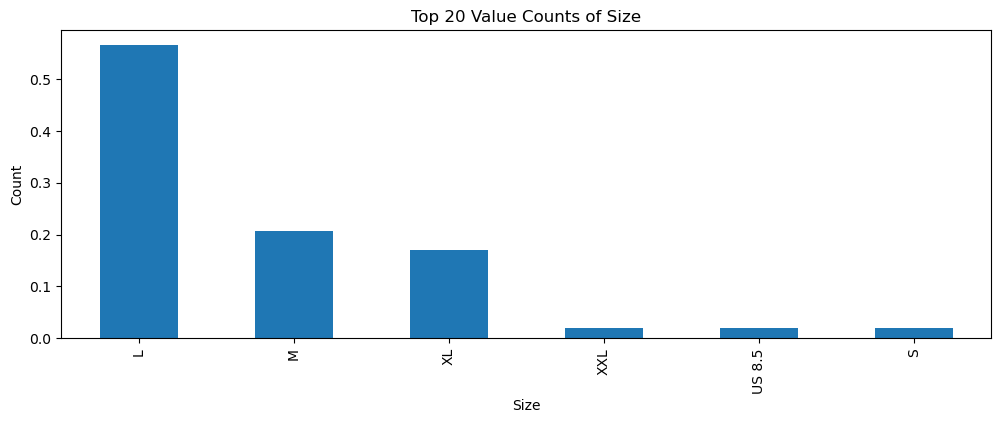

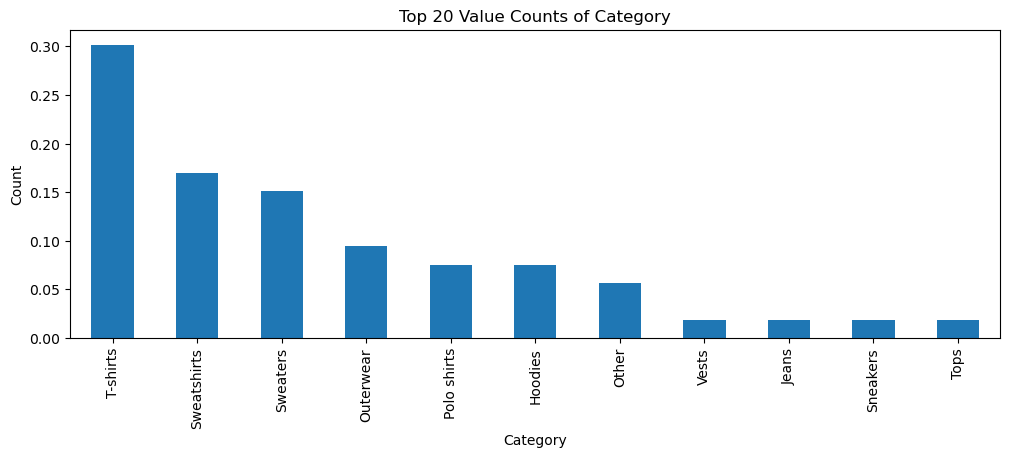

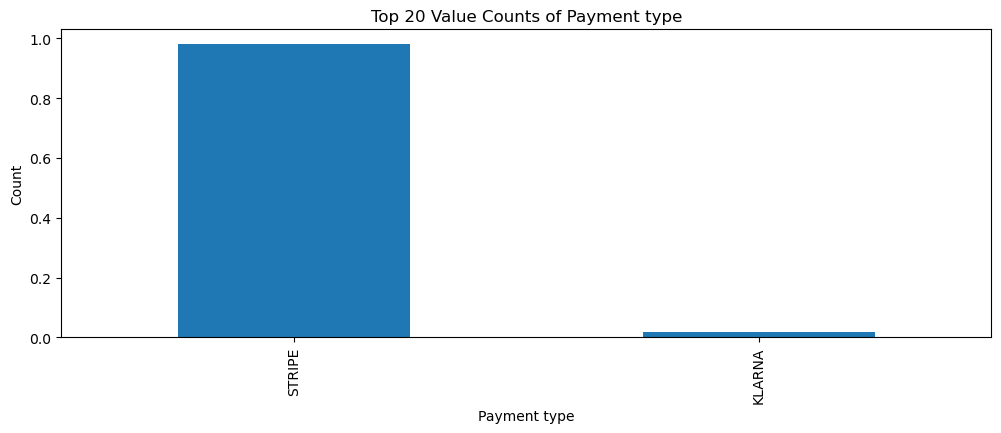

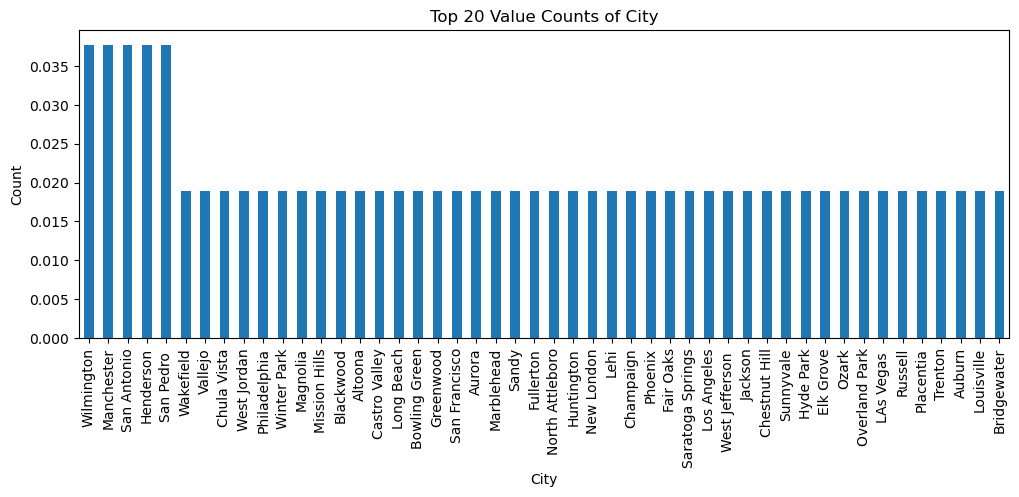

In [37]:
cat_cols = ['Brand', 'Size', 'Category', 'Payment type', 'City']

for col in cat_cols:
    plt.figure(figsize=(12,4))
    df[col].value_counts(20).plot(kind='bar')
    plt.title(f'Top 20 Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### Multivariate Analysis

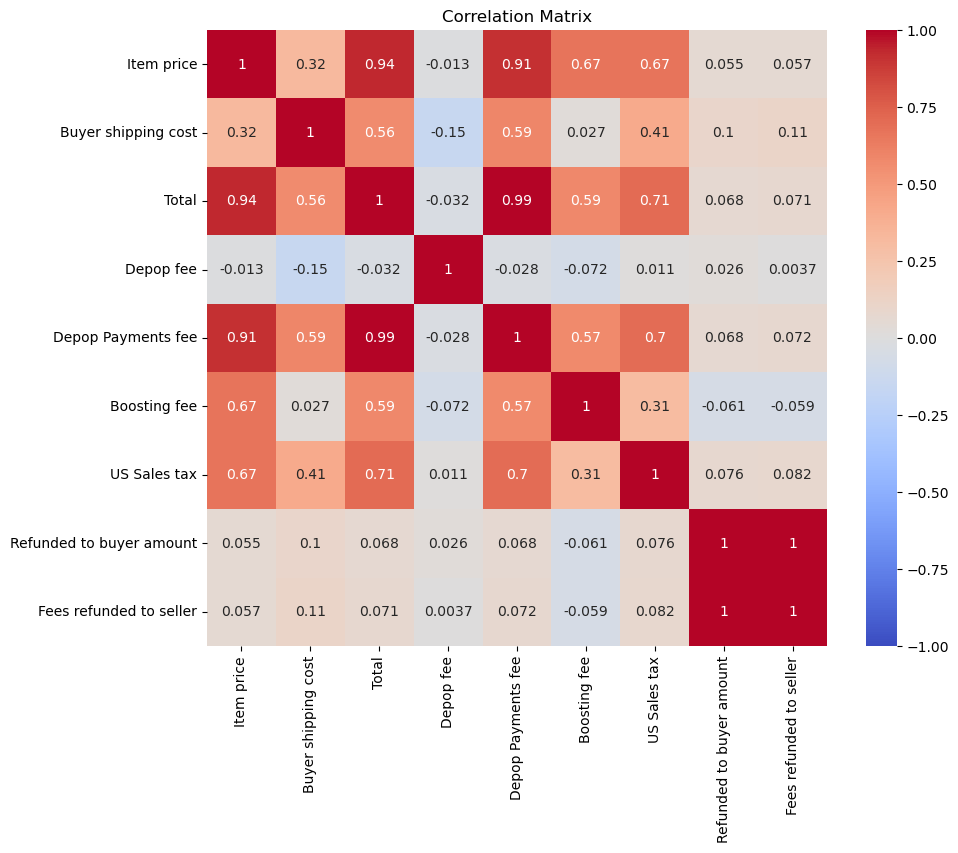

In [38]:
# Correlation matrix
df_no_usps = df.drop('USPS Cost', axis=1)
corr = df_no_usps.corr(numeric_only=True)

# Visualize using a heat map
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

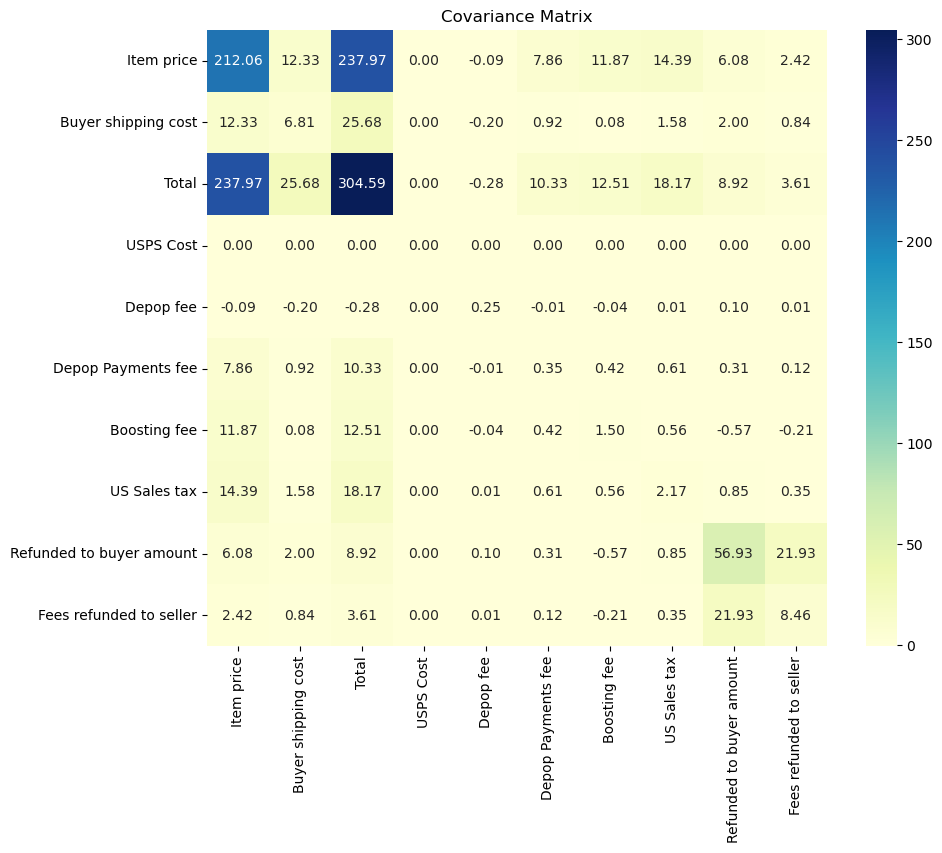

In [39]:
# Covariance Matrix
cov = df.cov(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(cov, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Covariance Matrix')
plt.show()


### Cramers V calculation

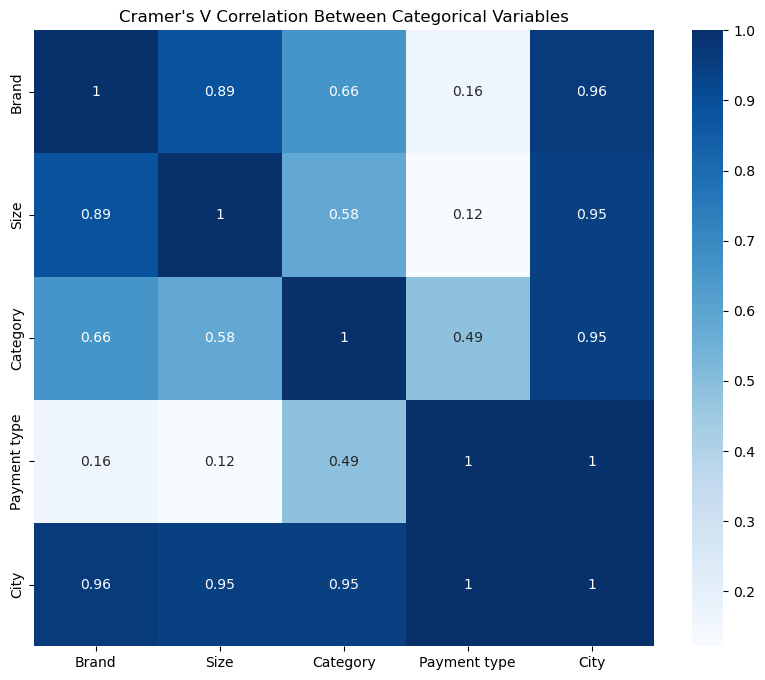

In [40]:
from scipy.stats import chi2_contingency

def cramers_v(x,y):
    """
    Method to perform the cramers v calculation 
    on two categorical variables to measure association
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/ n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            n_unique1 = df[col1].nunique()
            n_unique2 = df[col2].nunique()
            if n_unique1 > 1 and n_unique2 > 1:
                cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])
            else:
                 cramers_results.loc[col1, col2] = np.nan

cramers_results = cramers_results.astype(float)
plt.figure(figsize=(10,8))
sns.heatmap(cramers_results, annot=True, cmap='Blues')
plt.title("Cramer's V Correlation Between Categorical Variables")
plt.show()

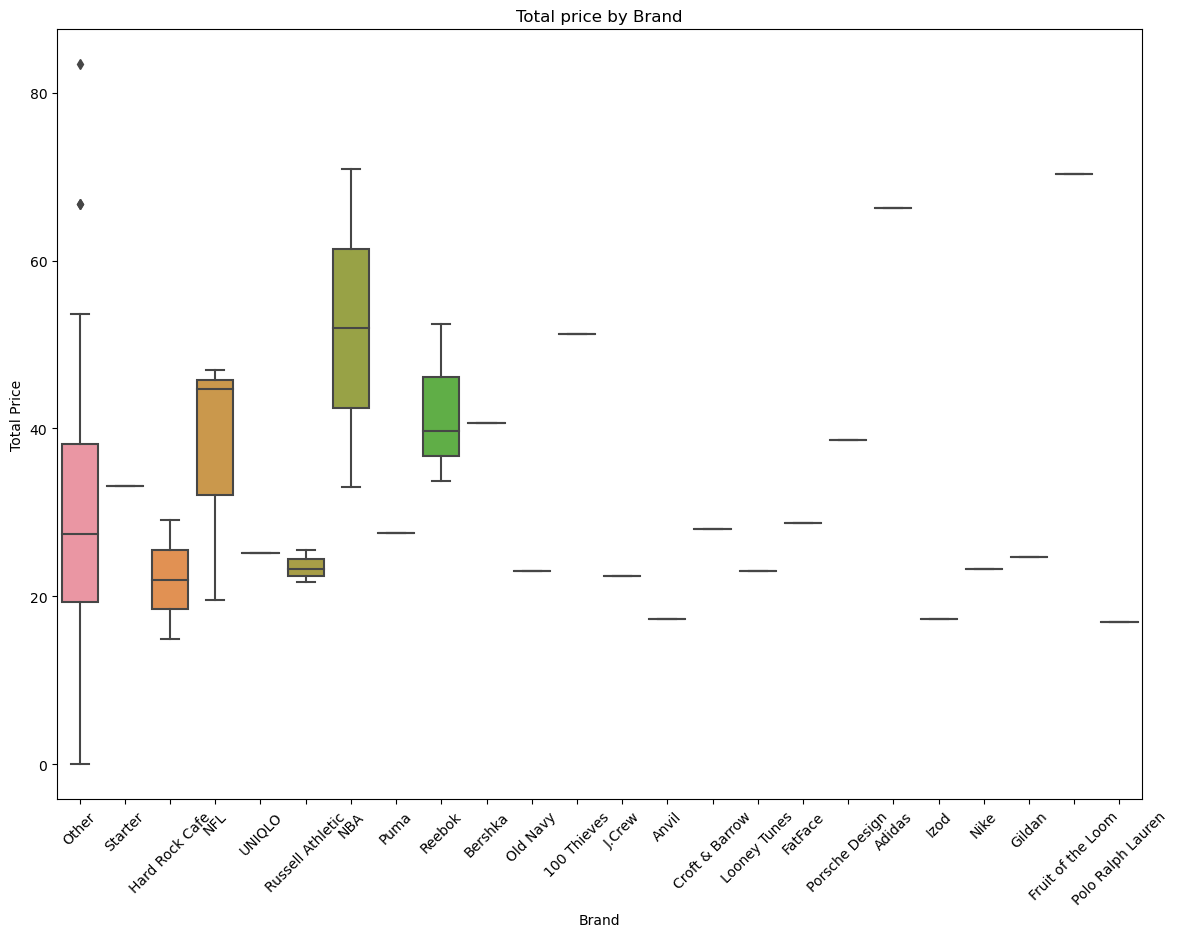

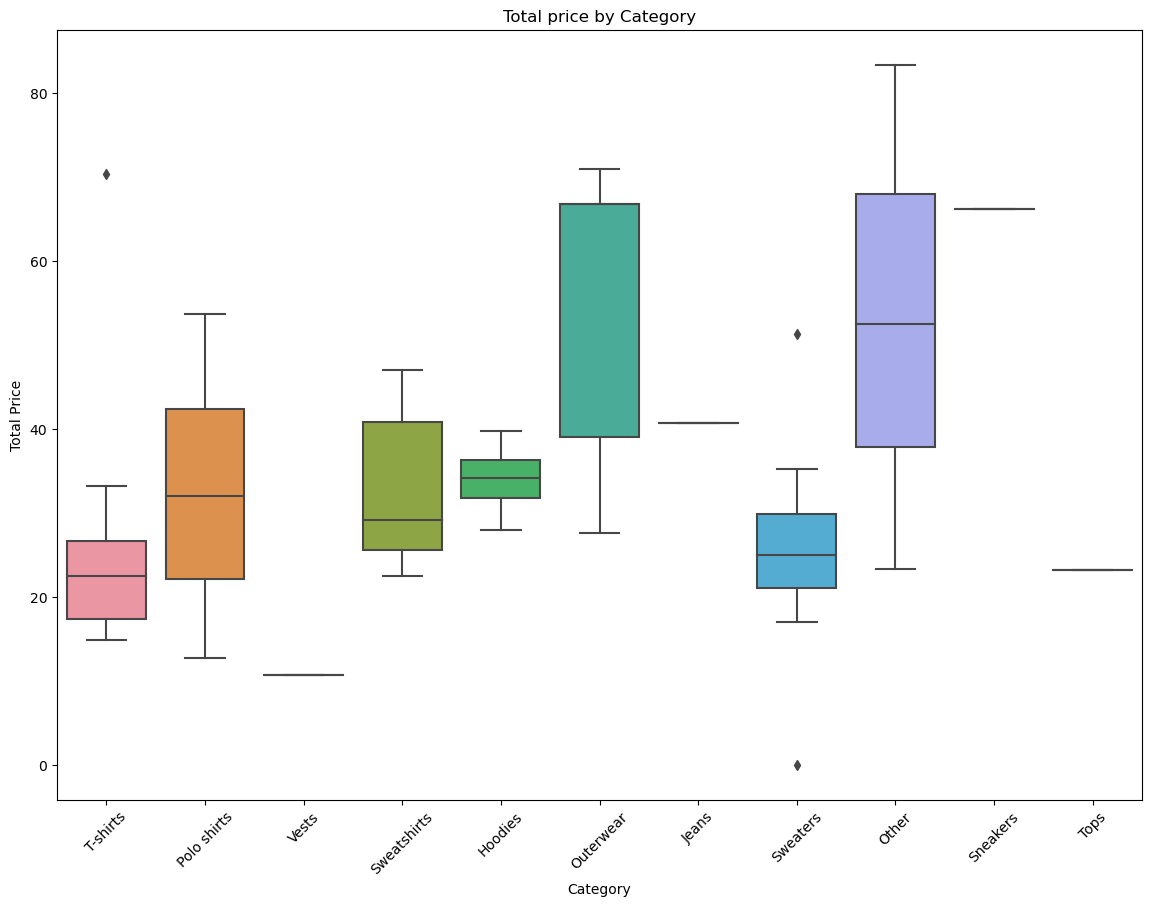

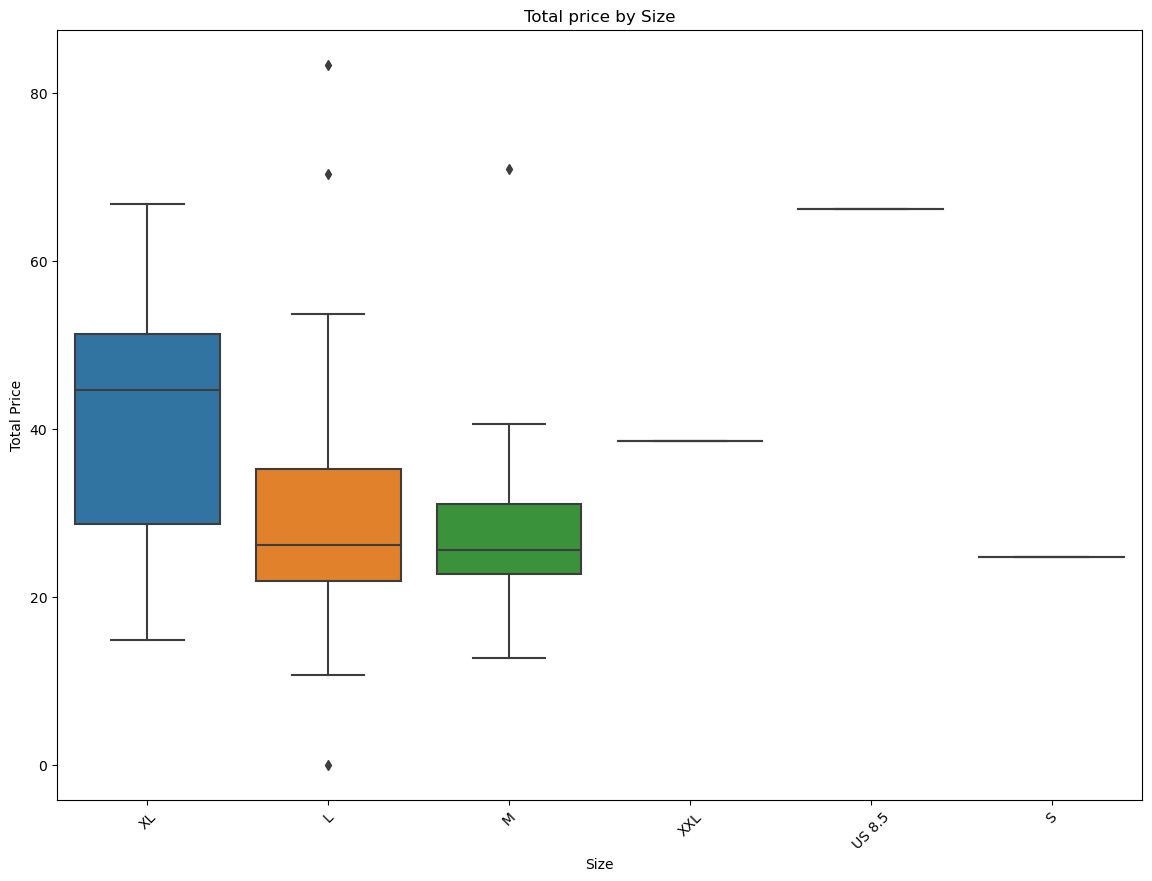

In [41]:
# Analysis between brand, category, and size based on total price

c_cols = ['Brand', 'Category', 'Size', ]
for col in c_cols:
    plt.figure(figsize=(14,10))
    sns.boxplot(x=df[col], y=df['Total'])
    plt.title(f'Total price by {col}')
    plt.xlabel(col)
    plt.ylabel('Total Price')
    plt.xticks(rotation=45)
    plt.show()

### DF For Cost Summary

In [42]:
# Class to create a depop cost analyzer to calculate earnings
class DepopCostAnalyzer:
    def __init__(self, df):
        self.df = df.copy()
        self.summary_df = None
    def build_summary(self):
        cost_cols = [
            'Item price', 'Buyer shipping cost', 'Total', 'USPS Cost',
            'Depop fee', 'Depop Payments fee', 'Boosting fee',
            'US Sales tax', 'Refunded to buyer amount', 'Fees refunded to seller'
        ]
        self.summary_df = self.df[cost_cols].copy()
        self.summary_df['Total Fees'] = (
        self.summary_df['Depop fee'] +
        self.summary_df['Depop Payments fee'] +
        self.summary_df['Boosting fee']
        )
        self.summary_df['Net Earnings'] = (
        self.summary_df['Total']
        - self.summary_df['USPS Cost']
        - self.summary_df['US Sales tax']
        - self.summary_df['Total Fees']
        + self.summary_df['Fees refunded to seller']
        - self.summary_df['Refunded to buyer amount']
        )
        return self.summary_df
    def get_total_profit(self):
        if self.summary_df is None:
                self.build_summary()
        return self.summary_df['Net Earnings']. sum()

# Use 
analyzer = DepopCostAnalyzer(df)
summary_df = analyzer.build_summary()
print(summary_df.head())
print("Total Net Earnings:", analyzer.get_total_profit())

   Item price  Buyer shipping cost  Total  USPS Cost  Depop fee  \
0        24.0                 6.29  31.97        0.0        2.4   
1        25.0                 6.29  33.15        0.0        2.5   
2        10.0                 6.29  17.08        0.0        0.0   
3         8.0                 6.29  14.91        0.0        0.0   
4         6.0                 6.29  12.73        0.0        0.0   

   Depop Payments fee  Boosting fee  US Sales tax  Refunded to buyer amount  \
0                1.51           0.0          1.68                      0.00   
1                1.54           0.0          1.86                      5.76   
2                1.01           0.0          0.79                      0.00   
3                0.94           0.0          0.62                      0.00   
4                0.87           0.0          0.44                      0.00   

   Fees refunded to seller  Total Fees  Net Earnings  
0                     0.00        3.91         26.38  
1           

In [47]:
summary_df.describe()

,Item price,Buyer shipping cost,Total,USPS Cost,Depop fee,Depop Payments fee,Boosting fee,US Sales tax,Refunded to buyer amount,Fees refunded to seller,Total Fees,Net Earnings
count,53.000000,53.000000,53.000000,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,22.875472,8.322264,32.826981,0.0,0.116981,1.524340,0.368302,1.643561,1.507547,0.563585,2.009623,28.229835
std,14.562398,2.609041,17.452486,0.0,0.499514,0.595065,1.224000,1.473153,7.545044,2.908937,1.682220,15.564313
min,4.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.060000
25%,14.000000,6.290000,22.460000,0.0,0.000000,1.190000,0.000000,0.070000,0.000000,0.000000,1.210000,18.500000
50%,17.300000,7.990000,27.920000,0.0,0.000000,1.370000,0.000000,1.470000,0.000000,0.000000,1.370000,23.950000
75%,25.000000,11.690000,39.690000,0.0,0.000000,1.760000,0.000000,2.310000,0.000000,0.000000,2.140000,34.900000
max,70.000000,11.690000,83.370000,0.0,2.500000,3.200000,5.600000,5.380000,49.300000,19.300000,8.800000,69.190000
